# SIMULATION OF A MULTIPLE SERVER QEUEING SYSTEM USING PYTHON AND JUPYTER NOTEBOOK

## importing the data

In [225]:
import pandas as pd 
from pandas import ExcelWriter 
from pandas import ExcelFile
import datetime as dt

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [227]:
data = pd.read_excel("data/Single Server Queue System.xlsm")
Inter_arrivaltime = pd.read_csv("data/interarrival_Time.txt")
Servicetime = pd.read_csv("data/ServiceTime.txt")
csv_data = pd.read_csv("data/Single_SQS.csv")
row_data = pd.read_csv('data/Single_SQS_Rowdata.csv')

In [228]:
row_data.columns

Index(['Customer', 'Arrival_Time', 'Start_Service_Time', 'End_Service_Time',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [229]:
row_data.drop(columns = ['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], inplace = True )


In [230]:
 df = row_data.dropna(how = 'all')

In [231]:
csv_data.set_index('Customer' , inplace = True)

In [232]:
csv_data

,Interarrival,Arrival_Time,Start_Service_Time,End_Service_Time,Queue_Waiting_Time,Service_Time,Total_Time_in_the_System,Idle_Time_of_Server
Customer,,,,,,,,
1,0.000000,08:31:00,08:31:00,08:33:25,0.000000,0.001678,0.001678,0.000000
2,0.000266,08:31:23,08:33:30,08:33:47,0.001470,0.000197,0.001667,0.000058
3,0.001817,08:34:00,08:34:45,08:36:00,0.000521,0.000868,0.001389,0.000671
4,0.002373,08:37:25,08:38:00,08:39:40,0.000405,0.001157,0.001563,0.001389
5,0.000104,08:37:34,08:39:44,08:40:20,0.001505,0.000417,0.001921,0.000046
6,0.001076,08:39:07,08:40:23,08:40:47,0.000880,0.000278,0.001157,0.000035
7,0.002731,08:43:03,08:43:07,08:45:00,0.000046,0.001308,0.001354,0.001620
8,0.000660,08:44:00,08:44:30,08:46:12,0.000347,0.001181,0.001528,0.000000
9,0.007639,08:55:00,08:55:10,08:56:00,0.000116,0.000579,0.000694,0.006227


In [239]:
row_data.head(9)

,Customer,Arrival_Time,Start_Service_Time,End_Service_Time
0,1.0,08:31:00,08:31:00,08:33:25
1,2.0,08:31:23,08:33:30,08:33:47
2,3.0,08:34:00,08:34:45,08:36:00
3,4.0,08:37:25,08:38:00,08:39:40
4,5.0,08:37:34,08:39:44,08:40:20
5,6.0,08:39:07,08:40:23,08:40:47
6,7.0,08:43:03,08:43:07,08:45:00
7,8.0,08:44:00,08:44:30,08:46:12
8,9.0,08:55:00,08:55:10,08:56:00


In [243]:
#row_data.Arrival_Time.str.split(':')

In [233]:
csv_data.dropna(how = 'all', inplace = True)

In [194]:
csv_data.head(4)

,Interarrival,Arrival_Time,Start_Service_Time,End_Service_Time,Queue_Waiting_Time,Service_Time,Total_Time_in_the_System,Idle_Time_of_Server
Customer,,,,,,,,
1,0.000000,08:31:00,08:31:00,08:33:25,0.000000,0.001678,0.001678,0.000000
2,0.000266,08:31:23,08:33:30,08:33:47,0.001470,0.000197,0.001667,0.000058
3,0.001817,08:34:00,08:34:45,08:36:00,0.000521,0.000868,0.001389,0.000671
4,0.002373,08:37:25,08:38:00,08:39:40,0.000405,0.001157,0.001563,0.001389


In [200]:
csv_data.Start_Service_Time = pd.to_datetime(csv_data.Start_Service_Time)
csv_data.End_Service_Time = pd.to_datetime(csv_data.End_Service_Time)
csv_data.Arrival_Time = pd.to_datetime(csv_data.Arrival_Time)

In [201]:
a = type(csv_data.Arrival_Time[1])
b= type(csv_data.Start_Service_Time[1])
c = type(csv_data.End_Service_Time[1])
print(a,b,c)

<class 'pandas._libs.tslibs.timestamps.Timestamp'> <class 'pandas._libs.tslibs.timestamps.Timestamp'> <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [202]:
csv_data.End_Service_Time = csv_data.End_Service_Time.dt.time

In [203]:
csv_data.Start_Service_Time = csv_data.Start_Service_Time.dt.time
csv_data.Arrival_Time =csv_data.Arrival_Time.dt.time
#csv_data.End_Service_Time = csv_data.End_Service_Time.dt.time


In [204]:
#csv_data.Start_Service_Time

In [205]:
#csv_data.Start_Service_Time = pd.to_datetime(csv_data.Start_Service_Time, format='%X')

In [206]:
#row_data.set_index('Customer' , inplace = True)

In [207]:
csv_data

,Interarrival,Arrival_Time,Start_Service_Time,End_Service_Time,Queue_Waiting_Time,Service_Time,Total_Time_in_the_System,Idle_Time_of_Server
Customer,,,,,,,,
1,0.000000,08:31:00,08:31:00,08:33:25,0.000000,0.001678,0.001678,0.000000
2,0.000266,08:31:23,08:33:30,08:33:47,0.001470,0.000197,0.001667,0.000058
3,0.001817,08:34:00,08:34:45,08:36:00,0.000521,0.000868,0.001389,0.000671
4,0.002373,08:37:25,08:38:00,08:39:40,0.000405,0.001157,0.001563,0.001389
5,0.000104,08:37:34,08:39:44,08:40:20,0.001505,0.000417,0.001921,0.000046
6,0.001076,08:39:07,08:40:23,08:40:47,0.000880,0.000278,0.001157,0.000035
7,0.002731,08:43:03,08:43:07,08:45:00,0.000046,0.001308,0.001354,0.001620
8,0.000660,08:44:00,08:44:30,08:46:12,0.000347,0.001181,0.001528,0.000000
9,0.007639,08:55:00,08:55:10,08:56:00,0.000116,0.000579,0.000694,0.006227


In [208]:
a = type(csv_data.Arrival_Time)
b= type(csv_data.Start_Service_Time)
c = type(csv_data.End_Service_Time)

In [199]:
f'A is:{a} B is: {b} C is {c}'

"A is:<class 'pandas._libs.tslibs.timestamps.Timestamp'> B is: <class 'pandas._libs.tslibs.timestamps.Timestamp'> C is <class 'pandas._libs.tslibs.timestamps.Timestamp'>"

In [135]:
df =row_data.dropna(how = 'all')

In [105]:
df.head()

,Arrival_Time,Start_Service_Time,End_Service_Time
Customer,,,
1.0,08:31:00,08:31:00,08:33:25
2.0,08:31:23,08:33:30,08:33:47
3.0,08:34:00,08:34:45,08:36:00
4.0,08:37:25,08:38:00,08:39:40
5.0,08:37:34,08:39:44,08:40:20


In [74]:
csv_data.dropna(how  = 'all', inplace = True)

In [106]:
csv_data.columns


Index(['Interarrival', 'Arrival_Time', 'Start_Service_Time',
       'End_Service_Time', 'Queue_Waiting_Time', 'Service_Time',
       'Total_Time_in_the_System', 'Idle_Time_of_Server'],
      dtype='object')

In [102]:
csv_data.head(9)

,Interarrival,Arrival_Time,Start_Service_Time,End_Service_Time,Queue_Waiting_Time,Service_Time,Total_Time_in_the_System,Idle_Time_of_Server
Customer,,,,,,,,
1,0.000000,2018-12-07 08:31:00,08:31:00,1900-01-01 08:33:25,0.000000,0.001678,0.001678,0.000000
2,0.000266,2018-12-07 08:31:23,08:33:30,1900-01-01 08:33:47,0.001470,0.000197,0.001667,0.000058
3,0.001817,2018-12-07 08:34:00,08:34:45,1900-01-01 08:36:00,0.000521,0.000868,0.001389,0.000671
4,0.002373,2018-12-07 08:37:25,08:38:00,1900-01-01 08:39:40,0.000405,0.001157,0.001563,0.001389
5,0.000104,2018-12-07 08:37:34,08:39:44,1900-01-01 08:40:20,0.001505,0.000417,0.001921,0.000046
6,0.001076,2018-12-07 08:39:07,08:40:23,1900-01-01 08:40:47,0.000880,0.000278,0.001157,0.000035
7,0.002731,2018-12-07 08:43:03,08:43:07,1900-01-01 08:45:00,0.000046,0.001308,0.001354,0.001620
8,0.000660,2018-12-07 08:44:00,08:44:30,1900-01-01 08:46:12,0.000347,0.001181,0.001528,0.000000
9,0.007639,2018-12-07 08:55:00,08:55:10,1900-01-01 08:56:00,0.000116,0.000579,0.000694,0.006227


AxesSubplot(0.125,0.125;0.775x0.755)


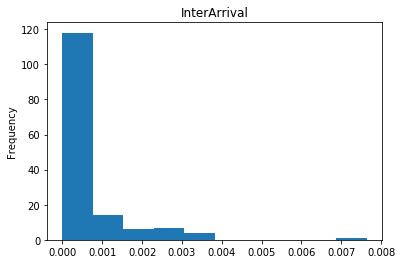

In [77]:
print(csv_data['Interarrival'].plot.hist(title = 'InterArrival'))

In [78]:
print('Count:' ,csv_data.Interarrival.count())
print('Std:' ,csv_data.Interarrival.std())
print('Mean:' ,csv_data.Interarrival.mean())

Count: 150
Std: 0.0009799735353227075
Mean: 0.0005832399999999997


AxesSubplot(0.125,0.125;0.775x0.755)


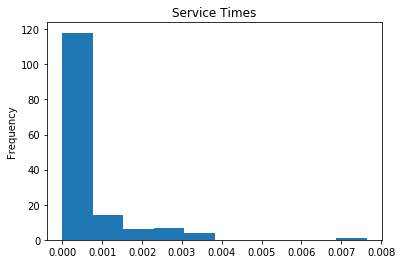

In [79]:
print(csv_data['Interarrival'].plot.hist(title = 'Service Times'))

In [26]:
print('Count:' ,csv_data.Service_Time.count())
print('Std:' ,csv_data.Service_Time.std())
print('Mean:' ,csv_data.Service_Time.mean())

Count: 150
Std: 0.00026781504386072253
Mean: 0.00026904000000000007


In [234]:
csv_data.head()

,Interarrival,Arrival_Time,Start_Service_Time,End_Service_Time,Queue_Waiting_Time,Service_Time,Total_Time_in_the_System,Idle_Time_of_Server
Customer,,,,,,,,
1,0.000000,08:31:00,08:31:00,08:33:25,0.000000,0.001678,0.001678,0.000000
2,0.000266,08:31:23,08:33:30,08:33:47,0.001470,0.000197,0.001667,0.000058
3,0.001817,08:34:00,08:34:45,08:36:00,0.000521,0.000868,0.001389,0.000671
4,0.002373,08:37:25,08:38:00,08:39:40,0.000405,0.001157,0.001563,0.001389
5,0.000104,08:37:34,08:39:44,08:40:20,0.001505,0.000417,0.001921,0.000046


In [238]:
#csv_data.Arrival_Time.str.split(':').apply(lambda x: int(x[0]) *60 + int(x[1]))

In [249]:
csv_data.columns

Index(['Interarrival', 'Arrival_Time', 'Start_Service_Time',
       'End_Service_Time', 'Queue_Waiting_Time', 'Service_Time',
       'Total_Time_in_the_System', 'Idle_Time_of_Server'],
      dtype='object')

### Table for the vital data

In [252]:
 Vdf =csv_data[['Interarrival', 'Queue_Waiting_Time', 'Service_Time',
       'Total_Time_in_the_System', 'Idle_Time_of_Server']]

In [253]:
Vdf.columns

Index(['Interarrival', 'Queue_Waiting_Time', 'Service_Time',
       'Total_Time_in_the_System', 'Idle_Time_of_Server'],
      dtype='object')

In [255]:
Vdf.describe()

,Interarrival,Queue_Waiting_Time,Service_Time,Total_Time_in_the_System,Idle_Time_of_Server
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.000583,0.000562,0.000269,0.000831,0.000329
std,0.000980,0.000460,0.000268,0.000503,0.000785
min,0.000000,0.000000,0.000023,0.000093,0.000000
25%,0.000058,0.000153,0.000084,0.000420,0.000012
50%,0.000174,0.000445,0.000197,0.000764,0.000046
75%,0.000691,0.000868,0.000333,0.001157,0.000162
max,0.007639,0.001921,0.001678,0.002338,0.006227


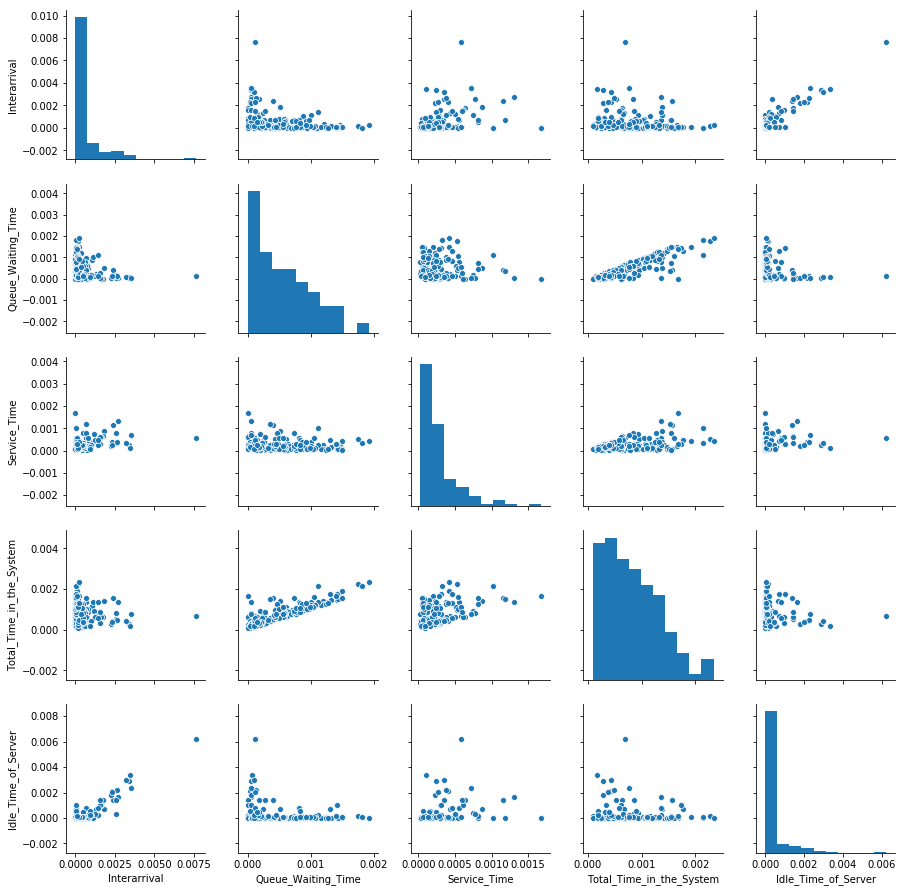

In [256]:
sns.pairplot(Vdf)